# Visualização LDA

Utilizaremos a distribuição de topicos de documentos como o vetor embedding do documento.

## 1. Preprocessamento do Texto
Usamos o dataset de sinopsis de filme como nossos documentos e removemos palavras raras e palavras comuns com base na sua frequência no documento. Removemos palavras que aparecem em menos de 2 documentos ou em mais de 30% dos documentos.

In [0]:
import pandas as pd
import re
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation
from gensim.models import ldamodel
from gensim.corpora.dictionary import Dictionary

# read data
dataframe = pd.read_csv('movie_plots.csv')


In [0]:
#me mostre o cabeçalho 

In [0]:
#me mostre o texto do filme um 


In [0]:

# remove stopwords and punctuations
def preprocess(row):
    return strip_punctuation(remove_stopwords(row.lower()))
    
dataframe['Plots'] = dataframe['Plots'].apply(preprocess)

# Convert data to required input format by LDA
texts = []
for line in dataframe.Plots:
    lowered = line.lower()
    words = re.findall(r'\w+', lowered, flags = re.UNICODE)# | re.LOCALE
    texts.append(words)
    
# Create a dictionary representation of the documents.
dictionary = Dictionary(texts)

# Filter out words that occur less than 2 documents, or more than 30% of the documents.
dictionary.filter_extremes(no_below=2, no_above=0.3)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(text) for text in texts]

## 2. Treinamos o modelo LDA

In [0]:
# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 50
iterations = 200
eval_every = None

# Train model
model = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, alpha='auto', 
                          eta='auto', iterations=iterations, num_topics=num_topics, passes=passes, 
                          eval_every=eval_every)

## 3. Distribuição de topicos de documentos
Usamos o método get_document_topics que realiza a infrencia de a distribuição de topicos de um documento. Retorna uma lista de tupa (topic_id, probability)

In [6]:
# Get document topics
all_topics = model.get_document_topics(corpus, minimum_probability=0)
all_topics[5]

[(0, 0.001300119),
 (1, 0.0010461216),
 (2, 0.0012642524),
 (3, 0.0012016305),
 (4, 0.0012563207),
 (5, 0.9891057),
 (6, 0.001143235),
 (7, 0.0013070549),
 (8, 0.0011749959),
 (9, 0.001200596)]

In [7]:
!pip install pyLDAvis
import pyLDAvis.gensim

viz = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.display(viz)

     |████████████████████████████████| 1.6MB 4.9MB/s 
     |████████████████████████████████| 552kB 28.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=cedc6f8ee201c7c185193b4278c98122dd111898d32d8efc3c776f8c09ef6ba3
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=79704d758c5d075e3e217e4baf8d5b19f0350773a8b87108c906909fde39491b
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


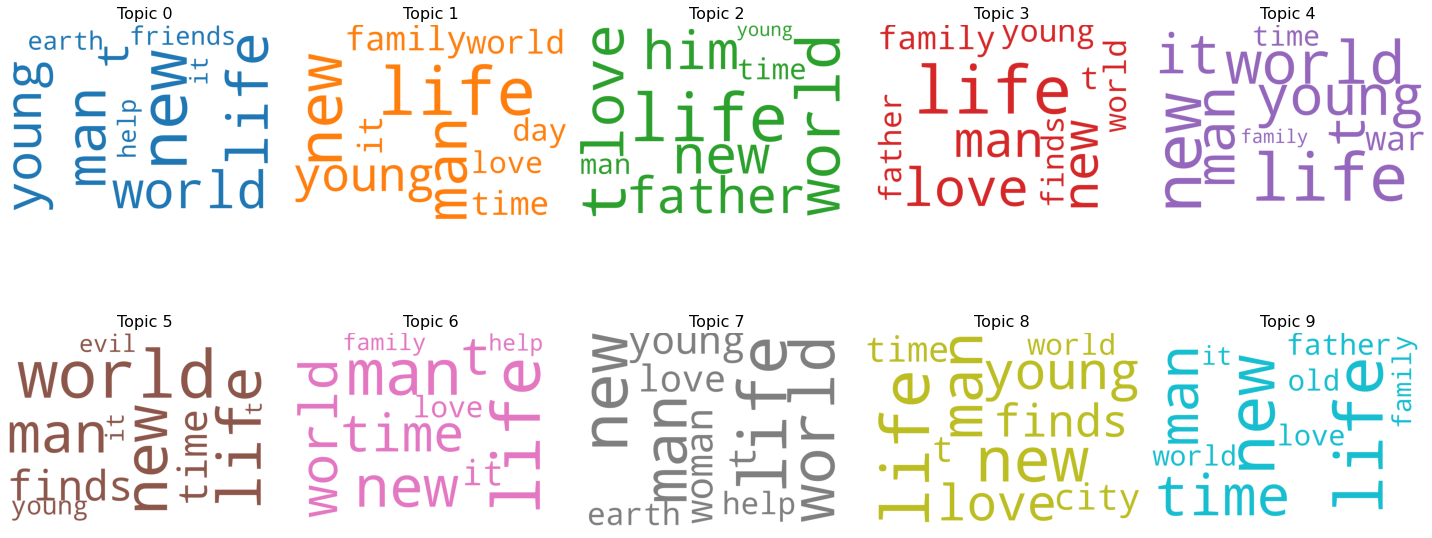

In [8]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=1250,
                  height=900,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=0.6)
topics = model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## 4. Preparando os arquivos de entrada para TensorBoard

In [0]:
from tensorboard_helper import CreateTensorboardData

In [0]:
vectors = [ [topics[1] for topics in doc_topics] for doc_topics in all_topics]
metadatos = [dataframe.Titles.values , dataframe.Genres.values]

In [11]:
CreateTensorboardData(tensor_filename="doc_lda", 
                      vectors=vectors, 
                      metadatos=metadatos,
                      colnames=["Titles","Genres"])

Arquivo com o Tensor 2D foi salvado em: doc_lda_tensor.tsv
Arquivo com o Tensor de metadatos foi salvado em: doc_lda_metadata.tsv


**Visualizando usando PCA ...**

**Visualizando usando T-SNE ...**

Levar os arquivos para http://projector.tensorflow.org/.

In [12]:
model.show_topic(topicid=0, topn=15)

[('new', 0.008250887),
 ('life', 0.0058557526),
 ('man', 0.0056867944),
 ('world', 0.004834164),
 ('young', 0.0047292174),
 ('t', 0.0034616545),
 ('friends', 0.0034598738),
 ('earth', 0.0034535415),
 ('help', 0.0033118555),
 ('it', 0.0031903724),
 ('finds', 0.0031767462),
 ('love', 0.0030965074),
 ('years', 0.0028913496),
 ('home', 0.0028417127),
 ('him', 0.0027610937)]